# Estudio Preliminar.
## Arreglando Nuestros Datos.

Nuestro objetivo principal es obtener un modelo para predecir el comportamiento de **Etherium** a futuro, a partir de un conjunto de datos que extraemos de un archivo *CSV*, esto la haremos mediante el módulo `pandas` mediante el comando `pd.read_csv()` como sigue:

In [1]:
#Importamos pandas y leemos el archivo:
import pandas as pd
Etherium = pd.read_csv(r'C:\Users\User\Desktop\Diplomado_Ciencia_Datos\Análisis_y_Predicción_de_Precios_de_Etherium_mediante_Modelos_de_Series_de_Tiempo\Data_Sets\Carta_de_Mercado_ETH.csv')
print(Etherium)

                     Date  Open  High   Low  Close  Volume
0     14/10/2016 17:26:00  1.20  1.23  1.17   1.21   87743
1     17/10/2016 17:26:00  1.23  1.25  1.18   1.23   73946
2     18/10/2016 17:26:00  1.24  1.27  1.21   1.25  119093
3     19/10/2016 17:26:00  1.23  1.30  1.23   1.26  116119
4     20/10/2016 17:26:00  1.28  1.29  1.23   1.25  100205
...                   ...   ...   ...   ...    ...     ...
1732    7/8/2023 17:26:00  3.06  3.08  3.01   3.02  129314
1733    8/8/2023 17:26:00  3.01  3.06  2.97   3.05  164504
1734    9/8/2023 17:26:00  3.02  3.09  3.02   3.06   54711
1735   10/8/2023 17:26:00  3.05  3.08  3.03   3.06   93012
1736   11/8/2023 17:26:00  3.02  3.07  3.02   3.04   38194

[1737 rows x 6 columns]


Nótese que una de las propiedades que aparecen aquí es **El Tiempo**, denotado como `Date`. Esto nos indica que nuestros datos deben tratarse como *Series de Tiempo*. Para estudiar las series de tiempo, además de nuestros módulos ya conocidos como `NumPy` (para diversas operaciones numéricas) y `Matplotlib` (para crear gráficas), necesitaremos un nuevo módulo llamado `Darts`. Este módulo está especializado en modelos de series de tiempo y se apoya en la clase inmutable `TimeSeries`, a la cual transformaremos nuestros datos de la siguiente manera:

In [2]:
# Primero arreglemos el Dataframe, para simplificar nuestro de los datos en el estudio:
Etherium['Date'] = Etherium['Date'].replace({'17:26:00':''}, regex=True)
Etherium['Date'] = pd.to_datetime(Etherium['Date'])

Etherium.index = Etherium['Date']
Etherium = Etherium.drop(['Date'], axis=1)

Etherium.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-14,1.20,1.23,1.17,1.21,87743
2016-10-17,1.23,1.25,1.18,1.23,73946
2016-10-18,1.24,1.27,1.21,1.25,119093
2016-10-19,1.23,1.30,1.23,1.26,116119
2016-10-20,1.28,1.29,1.23,1.25,100205


In [3]:
# Ahora instalemos los paquetes correspondintes:
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [4]:
# Por último creemos la base de datos con nuestra serie de tiempo usando TimeSeries:
TS_Etherium = TimeSeries.from_dataframe(Etherium, freq = 'D')
TS_Etherium.head()

<TimeSeries (DataArray) (Date: 5, component: 5, sample: 1)>
array([[[1.1900e+00],
        [1.2100e+00],
        [1.1900e+00],
        [1.2000e+00],
        [1.1955e+04]],

       [[1.3000e+00],
        [1.3300e+00],
        [1.3000e+00],
        [1.3300e+00],
        [1.8872e+04]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2016-01-11 2016-01-12 ... 2016-01-15
  * component  (component) object 'Open' 'High' 'Low' 'Close' 'Volume'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Para este estudio exploratorio, por simplicidad, nos limitaremos a exáminar únicamente una variable. Más específicamente la variable `Close`, de nuestra serie de tiempo. Sin embargo, en nuestra fuente de datos original, existen una cantidad considerables de *saltos* que representan fechas en nuestros datos medidos en **Días** de las que nuestra data no posee información, esto se podra observar gráficamente.

Por ello debemos graficar dicha variable; sin embargo, `Darts` no nos ofrece una gran variedad a la hora de realizar gráficas, por lo cual transformarenos de manera provisional nuestra Serie de Tiempo en un DataFrame de Pandas para poder generar mejores graficas a partir del modulo `MatPlotLib`:

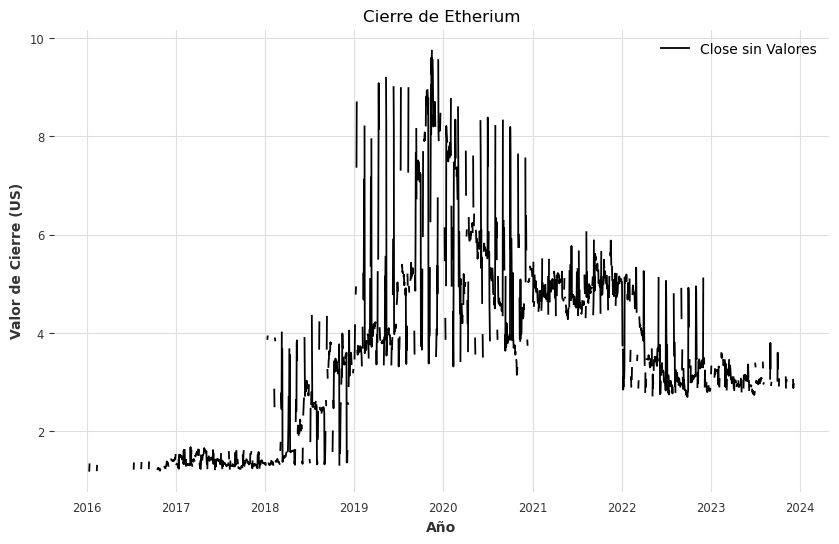

In [5]:
#Veamos como se comporta una variable de nuestra base de datos creada en TimeSeries, específicamente el valor con 
# el que el precio cerro (Close). Podremos graficarlo usando MatPlotLib:
import matplotlib.pyplot as plt

# Transformando la Serie de Tiempo close en un DataFrame de Pandas:
dummy = TS_Etherium['Close'].pd_dataframe()

#Finalmente obtendremos la grafica SIN haber reemplazado los valores faltantes:
plt.figure(figsize=(10, 6))
plt.plot(dummy.index, dummy['Close'], label='Close sin Valores')
plt.xlabel('Año')
plt.ylabel('Valor de Cierre (US)')
plt.title('Cierre de Etherium')
plt.legend()
plt.grid(True)
plt.show()

Por suerte, el módulo `Darts` tambien posee una funcionalidad que nos permitira *rellenar* estos datos faltantes como se muestra acontinuación:

In [6]:
from darts.utils.missing_values import fill_missing_values
TSC_Etherium = fill_missing_values(TS_Etherium)

Dado que Vamos a realizar la mayoria de nuestros modelos apartir de la variable **Close** en nuestra serie de tiempo, a pesar de ello, es comveniente tomar las variables de la serie, cada una por separado como una instancia en `Darts`.

In [7]:
# Definiendo las serise en las que vamos a trabajar:
Open = TSC_Etherium['Open']
Close = TSC_Etherium['Close']
High = TSC_Etherium['High']
Low = TSC_Etherium['Low']
Volume = TSC_Etherium['Volume']

Ahora realicemos la gráfica habiendo reemplazado los valores faltantes: 

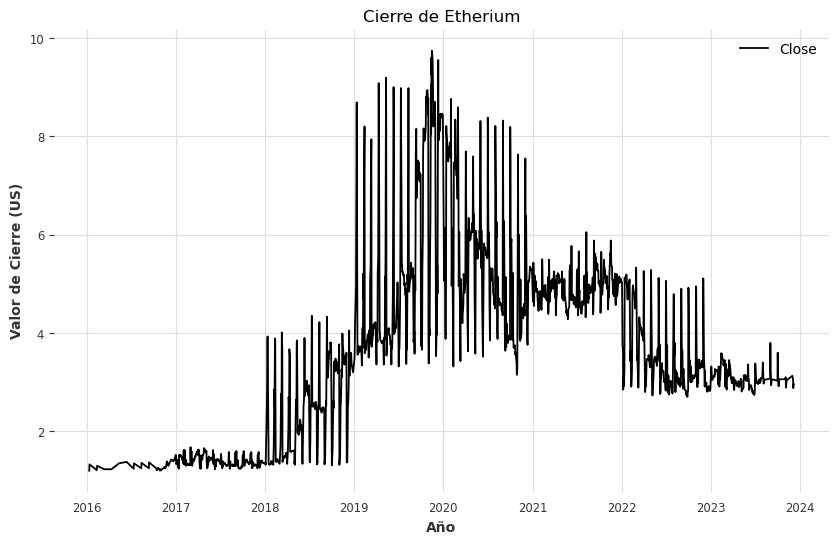

In [8]:
# Primero convertimos dicha serie de tiempo en un DataFrame de Pandas:
Close_Grafica = Close.pd_dataframe()

# Graficar la serie de tiempo 'Close'
plt.figure(figsize=(10, 6))
plt.plot(Close_Grafica.index, Close_Grafica['Close'], label='Close')
plt.xlabel('Año')
plt.ylabel('Valor de Cierre (US)')
plt.title('Cierre de Etherium')
plt.legend()
plt.grid(True)
plt.show()

## Estudio Preliminar de las Variables:

Apartir de nuestros datos ya transformados, podremos realizar un estudio preliminar comparativo entre las variables de las Series de Tiempo, podemos observar sus propiedades básicas por medio del método `describe()` de donde obtendremos los datos estadísticos primarios para cada variable:

In [9]:
Etherium.describe()

,Open,High,Low,Close,Volume
count,1737.000000,1737.000000,1737.000000,1737.000000,1.737000e+03
mean,3.709545,3.782677,3.630800,3.702406,3.642388e+05
std,1.821348,1.860248,1.775612,1.817103,4.460123e+05
min,1.190000,1.210000,1.170000,1.200000,1.186000e+03
25%,2.470000,2.510000,2.420000,2.480000,9.894800e+04
50%,3.540000,3.630000,3.450000,3.500000,2.139070e+05
75%,4.890000,4.990000,4.790000,4.880000,4.207740e+05
max,9.840000,10.080000,9.410000,9.740000,4.756581e+06


Notese que ltanto el Promedio como la Desviación Estandar son extremadamente similares para nuestras primeras 4 variables. Además podremos construir la matriz de correlaciones lineales, que estableceremos a travez del Coeficiente de Pearson. Tambien podriamos graficarlo, pero cuando se observe la matriz se entendera porque esto no es necesario: 

In [10]:
corr_matrix = TSC_Etherium.pd_dataframe().iloc[:,1:7].corr()
corr_matrix.head()

component,High,Low,Close,Volume
component,,,,
High,1.000000,0.999038,0.999429,0.491952
Low,0.999038,1.000000,0.999242,0.464314
Close,0.999429,0.999242,1.000000,0.482768
Volume,0.491952,0.464314,0.482768,1.000000


Donde se encuentra de nuevo, una correlacion muy alta entre nuestras primeras 4 variables y que la variable `Volume` no esta correlacionada con las demás. Despues de reemplazar los valores faltantes con `np.nan` podremos representar el cambio de estas variables a lo largo del tiempo de manera gráfica, compararlas entre ellas. Por ejemplo, grafiquemos la serie de la variable las variables posibles y comparemoslas con **Close**:

In [11]:
Open_Grafica = Open.pd_dataframe()
High_Grafica = High.pd_dataframe()
Low_Grafica = Low.pd_dataframe()
Volume_Grafica = Volume.pd_dataframe()

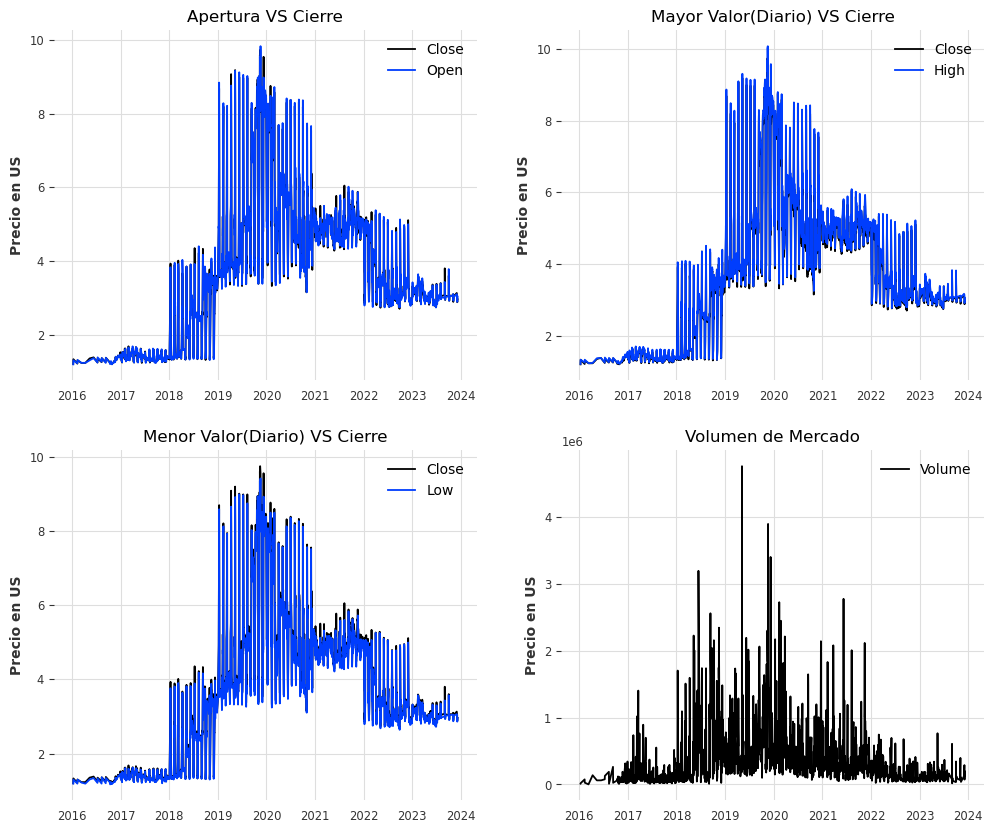

In [12]:
# Importemos un método de Darts que nos permita graficar la tendencia de cada variable:
from darts.models import NaiveSeasonal, NaiveDrift

# Graficar las series de tiempo comparadas con 'Close'
plt.figure(figsize=(12, 10))

# 'Close' VS 'Open'
plt.subplot(221)
plt.plot(Close_Grafica.index, Close_Grafica['Close'], label='Close')
plt.plot(Open_Grafica.index, Open_Grafica['Open'], label='Open')
plt.plot()

plt.ylabel('Precio en US')
plt.title('Apertura VS Cierre')
plt.legend()

# 'Close' VS 'High'
plt.subplot(222)
plt.plot(Close_Grafica.index, Close_Grafica['Close'], label='Close')
plt.plot(High_Grafica.index, High_Grafica['High'], label='High')
plt.plot()

plt.ylabel('Precio en US')
plt.title('Mayor Valor(Diario) VS Cierre')
plt.legend()

# 'Close' VS 'Low'
plt.subplot(223)
plt.plot(Close_Grafica.index, Close_Grafica['Close'], label='Close')
plt.plot(Low_Grafica.index, Low_Grafica['Low'], label='Low')
plt.plot()

plt.ylabel('Precio en US')
plt.title('Menor Valor(Diario) VS Cierre')
plt.legend()

# Grafica especial para el Volumen de Mercado:
plt.subplot(224)
plt.plot(Volume_Grafica.index, Volume_Grafica['Volume'], label='Volume')
plt.plot()

plt.ylabel('Precio en US')
plt.title('Volumen de Mercado')
plt.legend()
#No comparamos Volume con Close debido a la diferencia de escalas


plt.grid(True)
plt.show()

Notaremos que dichas graficas son prácticamente identicas, esto debido a la poca fluctuación de precios que ocurre durante solo 1 día. Gracias a este estudio preliminar se puede asegurar que realizar modelos separados para las variables `Close`,`High`,`Low` y `Open` no nos proveerá de información adicional. Entonces es mas conveniente tomar unicamente $1$ de estas variables y realizar varios modelos distintos para la misma.

## Construyendo un Primer Modelo:

Ahora, necesitamos separar que data usaremos para *Entrenar* el modelo y que data para comparar o *Validar* dicho modelo. Esto lo realizamos comúnmente separando entre un $80\%$ y un $20\%$  los valores de la variable `Close`, tanto para los de nuestra serie no diferenciada como para la que si:  

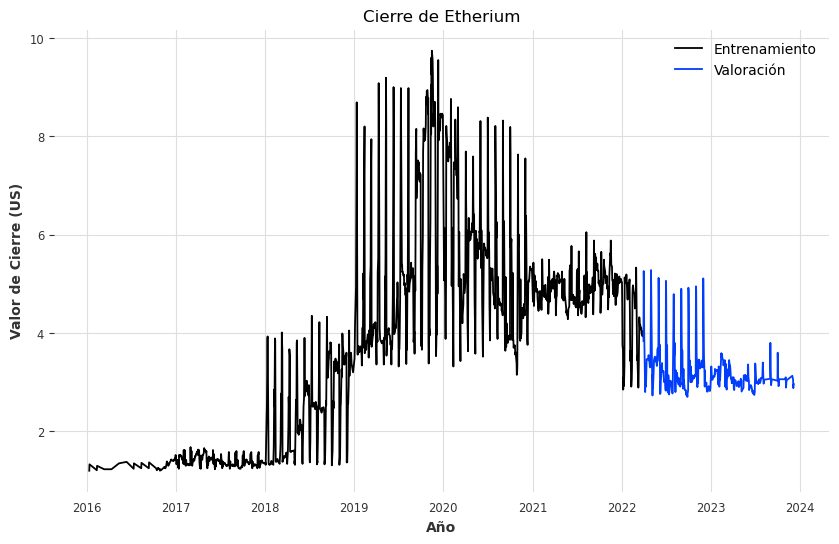

In [13]:
# Separando nuestros datos de Entrenamiento y Validación:
Close_Entrenamiento,Close_Valoracion = Close.split_before(pd.Timestamp('20220331'))

# Gráficas de la serie diferenciada y separada:
Close_Entrenamiento_Grafica = Close_Entrenamiento.pd_dataframe()
Close_Valoracion_Grafica = Close_Valoracion.pd_dataframe()

plt.figure(figsize=(10, 6))

plt.plot(Close_Entrenamiento_Grafica.index, Close_Entrenamiento_Grafica['Close'], label='Entrenamiento')
plt.plot(Close_Valoracion_Grafica.index, Close_Valoracion_Grafica['Close'], label='Valoración')

plt.xlabel('Año')
plt.ylabel('Valor de Cierre (US)')
plt.title('Cierre de Etherium')
plt.legend()
plt.grid(True)
plt.show()

Nótese que los datos de entre $2016$ y $2017$ son cuasi-nulos debido al bajo precio de la criptomoneda en esas épocas.

Ahora bien, una primera propuesta de modelación será el que simplemente *repite* el valor que ocurrio hace `K` unidades de tiempo (como nosotros establecimos estas unidades en `"D"`, este `K` seran K días) tomando en cuenta la periocidad y tendencia, esto se hace mediante el modelo preestablecido en `Darts` como `NaiveSeasonal`. Tambien debemos de ajustar dicha prediccion a la periocidad y tendencia respectiva, esto lo haremos mediante el modelo `NaiveDrift` como sigue:

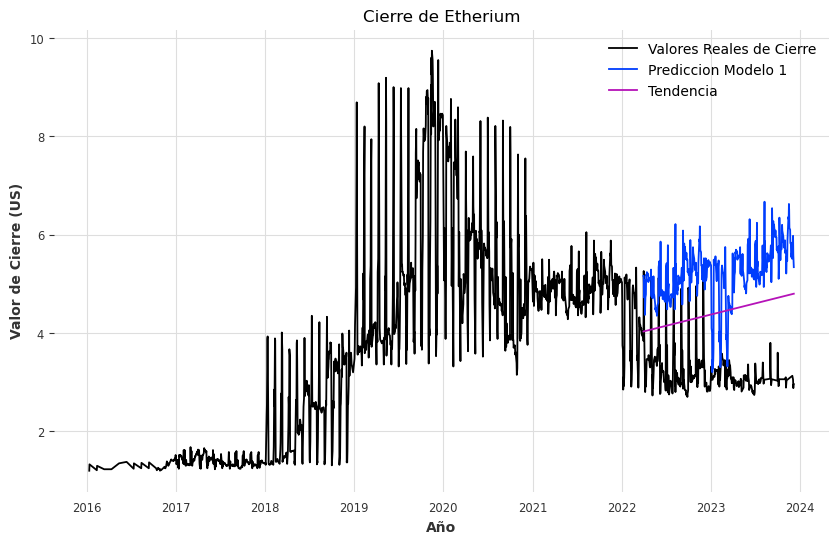

In [14]:
# Construyendo la repeticion estacionaria:
repeticion1 = NaiveSeasonal(K = 365)
repeticion1.fit(Close_Entrenamiento)

modelo1_no_corregido = repeticion1.predict(len(Close_Valoracion)) #Este es el número de días correspondiente a los datos de validación hasta 2024

# Construyendo el ajuste:
ajuste1 = NaiveDrift()
ajuste1.fit(Close_Entrenamiento)
ajuste1_modelo = ajuste1.predict(len(Close_Valoracion))

# Finalmente Construimos el Modelo:
Modelo_1 = ajuste1_modelo+modelo1_no_corregido-Close_Entrenamiento.last_value() #Este es el último valor de los datos Close_Entrenamiento

# Mostremos como se representa gráficamente este modelo con respecto a los datos:
Tendencia = ajuste1_modelo.pd_dataframe()
Modelo_1_Grafica = Modelo_1.pd_dataframe()

plt.figure(figsize=(10, 6))

plt.plot(Close_Grafica.index, Close_Grafica['Close'], label='Valores Reales de Cierre')
plt.plot(Modelo_1_Grafica.index, Modelo_1_Grafica['Close'], label='Prediccion Modelo 1')
plt.plot(Tendencia.index, Tendencia['Close'], label='Tendencia')

plt.xlabel('Año')
plt.ylabel('Valor de Cierre (US)')
plt.title('Cierre de Etherium')
plt.legend()
plt.grid(True)
plt.show()

Sin embargo, si comparamos esta con la gráfica anterior queda claro que dicho modelo no es para nada preciso. Asi que debemos tomar un modelo mas *Refinado*.

## Estacionalidad y Prueba ACF.

La **Estacionalidad** es un cambio en la media de la serie que se repite periódicamente cada s estaciones. Los modelos de series de tiempo se pueden dividir en dos grandes grupos: los estacionales y los NO estacionales. Asi, es importante analizar la estacionalidad de los valores de la variable `Close`, esto se puede hacer mediante la funcionalidad `check-seasonality` de `Darts` como sigue:  

In [15]:
# Primero importemos el sub-paquete:
from darts.utils.statistics import check_seasonality

In [16]:
# Estudiemos la estacionalidad de la serie completa:
print('Estacionalidad de la Serie Completa:')

for m in range(2, 25):
    is_seasonal, period = check_seasonality(Close, m=m, alpha=0.05)
    if is_seasonal:
        print("Hay estacionalidad de orden {}.".format(period))

# Ahora estudiemos la estacionalidad de los datos de entrenamientos diferenciados:
print('Estacionalidad Serie de Entrenamiento:')

for m in range(2, 25):
    is_seasonal, period = check_seasonality(Close_Entrenamiento, m=m, alpha=0.05)
    if is_seasonal:
        print("Hay estacionalidad de orden {}.".format(period))

Estacionalidad de la Serie Completa:
Hay estacionalidad de orden 11.
Estacionalidad Serie de Entrenamiento:
Hay estacionalidad de orden 11.


Para poder conseguir nuestro objetivo necesitamos primero construir un modelo para nuestras series de tiempo, para poder determinar que tipo de modelo debemos usar necesitamos obtener información de como se comportan nuestros datos. Lo anterior se realiza mediante la **Función de AutoCorrelación** mejor conocida como *ACF*.

Dicha función se calcula mediante el *Coeficiente de Correlación de Pearson* entre la serie original una versión desplazada de si misma. Esta función es una medida **Adimensional** de la dependencia lineal entre variables aleatorias de un **Proceso Estocástico**. Esto se hace por medio de la función `plot_acf`:

In [17]:
from darts.utils.statistics import plot_acf

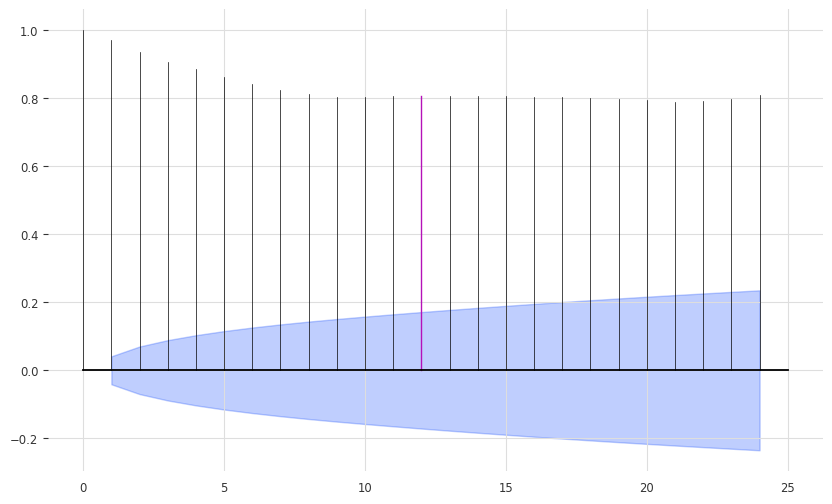

In [18]:
# Gráfiquemos el ACF de Close con un desface de m=6:
plot_acf(Close_Entrenamiento, m=12, alpha = 0.05, fig_size = (10,6))

# Pruebas de Modelos Clásicos:

El objetivo fundamental de este proyecto es obtener un modelo capaz de predecir los futuros precios de Etherium, por lo visto anteriormente, esto significa un modelo satisfactorio para la variable `Close` de la Serie de Tiempo. Para ello probaremos primero con $3$ modelos *Clásicos* que ya estan preestablecidos en el módulo de `Darts`, estos son:
- Suavizado Exponencial
- AutoARIMA
- Modelo $\theta$

Además, para calcular el error de dichos modelos utilizaremos el **Error porcentual absoluto medio (MAPE)** con lo cual podremos (dando por hecha la descripción gráfica) comparar dichos modelos. 

In [19]:
#Importando los modelos pre-establecidos:
from darts.models import ExponentialSmoothing, AutoARIMA, Theta
#Importando el método para calcular MAPE:
from darts.metrics import mape

## Modelo de Suavizado Exponencial:

Este modelo calcula una media ponderada exponencial de los valores pasados de la serie.Cada observación recibe un peso que disminuye exponencialmente a medida que se retrocede en el tiempo.

In [20]:
#Tomemos el Modelo de Suavizado Exponencial predefinido en Darts, Ajustado a la Estacionalidad de Close:
Modelo_Suavizado = ExponentialSmoothing(seasonal_periods=11)
#Ajustemos el modelo a nuestros datos de Entrenamiento:
Modelo_Suavizado.fit(Close_Entrenamiento)
#Realicemos los Pronoscticos para compararlos con nuestros datos de Valoración:
prediccion_suavizado = Modelo_Suavizado.predict(len(Close_Valoracion))

#Ahora determinemos el Error con respecto a la valoración usando MAPE:
print("El MAPE es: {:.2f}".format(mape(Close_Valoracion, prediccion_suavizado)))

El MAPE es: 40.70


## Modelado AutoARIMA:

El modelo ARIMA, tambien llamado Modelo Auto Regresivo Integrado de Media Movil combina componentes de autoregresión (AR), promedio móvil (MA) y diferenciación (I) para capturar tanto la dependencia en el tiempo como la estacionalidad presente en los datos.

El algoritmo AutoARIMA permite realizar un ajuste de modelo ARIMA de manera automatica.

In [21]:
#Usemos el método predefinido de Darts AutoARIMA:
Modelo_Arima = AutoARIMA(seasonal_periods=11)
#Ajustemos el modelo a nuestros datos de Entrenamiento:
Modelo_Arima.fit(Close_Entrenamiento)
#Realicemos los Pronoscticos para compararlos con nuestros datos de Valoración:
prediccion_arima = Modelo_Arima.predict(len(Close_Valoracion))

#Ahora determinemos el Error con respecto a la valoración usando MAPE:
print("El MAPE es: {:.2f}".format(mape(Close_Valoracion, prediccion_arima)))

El MAPE es: 34.28


## Modelo Theta $\theta$:

El modelo de caminata aleatoria o tambien de primer orden autoregresivo, consiste en construir el valor futuro a partir de la suma del valor actual con un componente de ruido aleatorio. Para optimizar dicha predicción se añade un parametro $\theta$ que sirve como peso, y sirve para ajustar el modelo a la Serie de Tiempo.

Teniendo en cuenta esto, optimizaremos el valor $\theta$ buscando un valor que reduzca al mínimo posible el Error MAPE. Como sigue a continuación:

In [22]:
# Buscar el mejor parámetro theta probando 500 valores diferentes
thetas = 2 - np.linspace(-10, 10, 500)

mape_minimo = float("inf")
theta_optimo = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(Close_Entrenamiento)
    prediccion_theta = model.predict(len(Close_Valoracion))
    residuo = mape(Close_Valoracion, prediccion_theta)

    if residuo < mape_minimo:
        mape_minimo = residuo
        theta_optimo = theta

Con este $\theta$ ya encontrado, podremos aplicar el modelo pre-establecido por `Darts` como en los anteriores:

In [23]:
#Usemos el método predefinido de Darts Theta:
modelo_theta_optimizado = Theta(theta_optimo)
#Ajustemos el modelo a nuestros datos de Entrenamiento:
modelo_theta_optimizado.fit(Close_Entrenamiento)
#Realicemos los Pronoscticos para compararlos con nuestros datos de Valoración:
prediccion_modelo_theta = modelo_theta_optimizado.predict(len(Close_Valoracion))

#Ahora determinemos el Error con respecto a la valoración usando MAPE:
print("El MAPE es: {:.2f}, con theta = {}.".format(mape(Close_Valoracion, prediccion_modelo_theta), theta_optimo))

El MAPE es: 11.81, con theta = 0.5370741482965933.


## Comparación Gráfica:

Como se vio a travez del error MAPE pudimos notar que estos modelos no son capaces de predecir de manera satrisfactoria nuestros datos, y esto se puede notar mejor cuando lo representamos gráficamente y los comparamos con los datos de valoración real:

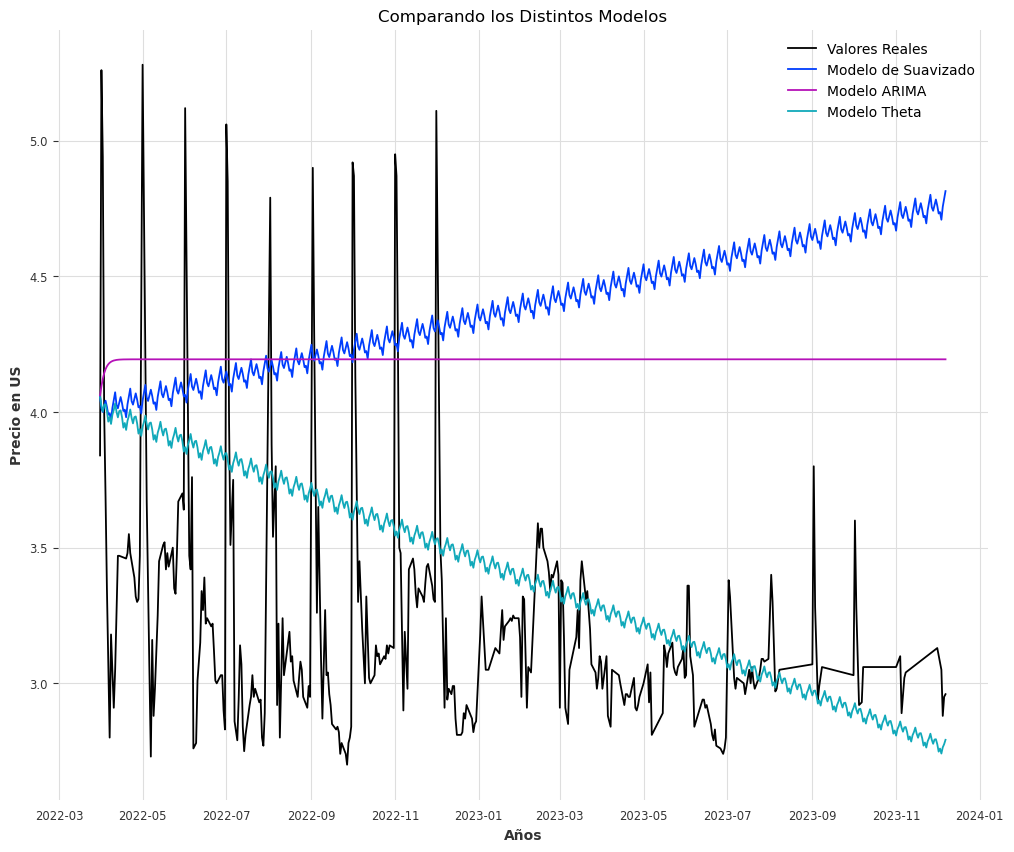

In [42]:
#Transformando nuestros modelos para poder graficarlos:
suavizado_grafica = prediccion_suavizado.pd_dataframe()
arima_grafica = prediccion_arima.pd_dataframe()
tetha_grafica = prediccion_modelo_theta.pd_dataframe()

# Utilizando MatPlotLib para graficar nuestras predicciones, con subplot():
plt.figure(figsize=(12, 10))

# Comparando el Modelo de Suavizado:

#plt.plot(Close_Entrenamiento_Grafica.index, Close_Entrenamiento_Grafica['Close'], label='Entrenamiento')
plt.plot(Close_Valoracion_Grafica.index, Close_Valoracion_Grafica['Close'], label='Valores Reales')
plt.plot(suavizado_grafica.index, suavizado_grafica['Close'], label = 'Modelo de Suavizado')

plt.plot()


# Comparando con el Modelo AutoARIMA:

#plt.plot(Close_Entrenamiento_Grafica.index, Close_Entrenamiento_Grafica['Close'], label='Entrenamiento')
#plt.plot(Close_Valoracion_Grafica.index, Close_Valoracion_Grafica['Close'], label='Valores Reales')
plt.plot(arima_grafica.index, arima_grafica['Close'], label = 'Modelo ARIMA')

plt.plot()



# Comparando con el Modelo Tetha:

#plt.plot(Close_Entrenamiento_Grafica.index, Close_Entrenamiento_Grafica['Close'], label='Entrenamiento')
#plt.plot(Close_Valoracion_Grafica.index, Close_Valoracion_Grafica['Close'], label='Valores Reales')
plt.plot(tetha_grafica.index, tetha_grafica['Close'], label = 'Modelo Theta')

plt.plot()


plt.ylabel('Precio en US')
plt.xlabel('Años')
plt.title('Comparando los Distintos Modelos')
plt.legend()


plt.grid(True)
plt.show()

El único modelo que parece acercarse minimamente a nuestros datos de valoración es el de *Theta*. Sin embargo, sigue sin ser satisfactoria.

Podriamos volver a esto más adelante.

# Modelo de Redes Neuronales Recurrentes:

Este es un modelo de Red Neuronal que opera principalmente con multiplicación de matrices y trata de forma eficiente datos secuenciales (como es el caso de las Series de Tiempo). 
Existen, dentro del módulo `Darts`, dos formas distintas (y por tanto dos modelaciones distintas) de aplicar este modelo: el primero es `RNNModel` y el otro `BlockRNNModel`, en esta parte trabajaremos con la segunda, esto debido al caracter estacionario de nuestra serie y al hecho de que su MAPE es el menor.

Para utilizarlos debemos instalar una serie de elemntos primero:

In [27]:
# Esto para entrenar la red neuronal
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
# Los paquetes necesarios
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
#import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

#from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, BlockRNNModel #ExponentialSmoothing
from darts.metrics import mape
from darts.utils.statistics import check_seasonality #plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

Este modelo depende en gran medida de las covariantes de las Series de Tiempo que se deben obtener de antemano. En nuestro caso tomaremos series covariantes de forma anual y mensual.

Para construir nuestro modelo primero necesitamos que los datos descarten la tendencia y la variacion, o sea primero debemos normalizar la Serie de Tiempo:

In [29]:
#Primero normalicemos la serie de Tiempo:
transformador = Scaler()
Close_Entrenamiento_transformada = transformador.fit_transform(Close_Entrenamiento)
Close_Valoracion_transformada = transformador.transform(Close_Valoracion)
Close_transformada = transformador.transform(Close)

Ahora debemos hallar las covarianzas anuales y mensuales:

In [30]:
#Crear las Series de Covarianza para el Mes y el Año:
serie_anual = datetime_attribute_timeseries(
    pd.date_range(start=Close.start_time(), freq=Close.freq_str, periods=len(Close)), #Numero de dias(creo)
    attribute="year",
    one_hot=False,
)
serie_anual = Scaler().fit_transform(serie_anual)
serie_mensual = datetime_attribute_timeseries(
    serie_anual, attribute="month", one_hot=True
)
covariantes = serie_anual.stack(serie_mensual)
Covarianza_Entrenamiento, Covarianza_Valoracion = covariantes.split_after(pd.Timestamp("20220331"))

## Modelo RNN a Bloques:

El modelo a Bloques tiene una etapa codificadora recurrente y nua decodificadora de Red Neuronal, produce predicciónes de *Longitud* basada en el último estado del a etapa codificadora. Este modelo produce *Bloques* de pronósticos.

Como ya poseemos la Variable Close normalizada y tenemos las Covariantes, no es necesario hacer dichas operaciones, por lo que podemos entrenar nuestra **Red Neuronal**, para ello usaremos el mecánismo de activación de Unidades Recurrentes Cerradas (GRU):

In [31]:
#Entrenamiento de Red Neuronal Recurrente en Bloques:
Red_Neuronal_Bloques = BlockRNNModel(
    model="GRU",
    input_chunk_length=125,
    output_chunk_length=36,
    hidden_dim=10,
    n_rnn_layers=1,
    batch_size=32,
    n_epochs=100,
    dropout=0.1,
    model_name="Close_GRU",
    nr_epochs_val_period=1,
    optimizer_kwargs={"lr": 1e-3},
    log_tensorboard=True,
    random_state=42,
    force_reset=True,
)

Ahora procederemos a entrenar esta nueva Red Neuronal:

In [33]:
Red_Neuronal_Bloques.fit(Close_Entrenamiento_transformada, val_series=Close_Valoracion_transformada, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

BlockRNNModel(model=GRU, hidden_dim=10, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.1, input_chunk_length=125, output_chunk_length=36, batch_size=32, n_epochs=100, model_name=Close_GRU, nr_epochs_val_period=1, optimizer_kwargs={'lr': 0.001}, log_tensorboard=True, random_state=42, force_reset=True)

Con lo cual podremos realizar la predicción, graficarla y compararla con los valores reales:

Predicting: 0it [00:00, ?it/s]

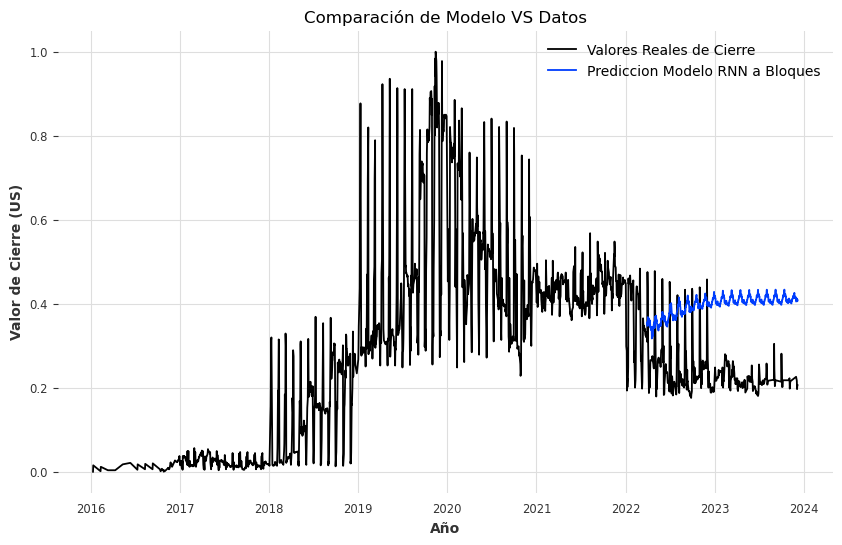

In [37]:
# Primero realizamos la predicción con el modelo correspondiente:
prediccion_RNN_Bloques = Red_Neuronal_Bloques.predict(n=len(Close_Valoracion))

# Transformando nuestras Time Series en DataFrames para gráficar:
Close_Transformada_Grafica = Close_transformada.pd_dataframe()
Bloques_Grafica = prediccion_RNN_Bloques.pd_dataframe()

# Mostremos como se representa gráficamente este modelo con respecto a los datos:
plt.figure(figsize=(10, 6))

plt.plot(Close_Transformada_Grafica.index, Close_Transformada_Grafica['Close'], label='Valores Reales de Cierre')
plt.plot(Bloques_Grafica.index, Bloques_Grafica['Close'], label='Prediccion Modelo RNN a Bloques')

plt.xlabel('Año')
plt.ylabel('Valor de Cierre (US)')
plt.title('Comparación de Modelo VS Datos')
plt.legend()
plt.grid(True)
plt.show()

Calculando su MAPE, tendremos lo siguiente:

In [39]:
print("El MAPE es: {:.2f}".format(mape(Close_Valoracion_transformada, prediccion_RNN_Bloques)))

El MAPE es: 76.78
